In [2]:
import pandas as pd
from glob import glob
import itertools
from collections import Counter
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import time
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import powerlaw
from sklearn import linear_model
import os
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
from scipy import stats
import seaborn as sns

/Users/xuhuimin/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/xuhuimin/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/xuhuimin/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/xuhuimin/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/xuhuimin/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/xuhuimin/anaconda3/lib/

# basename_except with all complete user profile information

In [4]:
columns = 'user_id，sex，age，occupation_name，education_name，user_opentime，brand_name，call_duration_m，gprs_flow，\
call_fee，gprs_fee，databusiness_fee，brand_chn，model_chn，screensize，operation_sys，terminal_price，\
dept_county_name，dept_name，house_price，fees'.split('，')

basename_except = pd.read_csv('./basename_except.csv', names=columns)

behavior=pd.read_csv('./behavior.csv')

names=['record','location']
for n in names:
    diction=dict(behavior[['user_id',n]].values)
    basename_except[n]=basename_except['user_id'].apply(lambda x: diction[x]
                                                              if x in diction
                                                              else np.nan)

basename_except.to_csv('./basename_except.csv',index=False)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# choose the richest and the poorest

In [2]:
basename_except=pd.read_csv('./basename_except.csv')

house=basename_except[basename_except['house_price'].astype('str')!='nan']
terminal=basename_except[basename_except['terminal_price'].astype('str')!='nan']

high_house=house.sort_values(by=['house_price'],ascending=False)[:int(len(house)*0.20)]['user_id'].values
high_terminal=terminal.sort_values(by=['terminal_price'],ascending=False)[:int(len(terminal)*0.20)]['user_id'].values
# high_fees=fees.sort_values(by=['fees'],ascending=False)[:int(len(fees)*0.50)]['user_id'].values

high=set(high_house)&set(high_terminal)#&set(high_fees)

print(len(high))

low_house=house.sort_values(by=['house_price'],ascending=False)[int(len(house)*0.80):-1]['user_id'].values
low_terminal=terminal.sort_values(by=['terminal_price'],ascending=False)[int(len(terminal)*0.80):-1]['user_id'].values
# low_fees=fees.sort_values(by=['fees'],ascending=False)[int(len(fees)*0.50):-1]['user_id'].values

low=set(low_house)&set(low_terminal)

print(len(low))


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1704
1404


In [3]:
low=basename_except.loc[basename_except['user_id'].isin(low)]
high=basename_except.loc[basename_except['user_id'].isin(high)]

In [16]:
low['location'].mean()

44.17948717948718

In [17]:
high['location'].mean()

52.813380281690144

In [34]:
low['record'].mean()/31

249.445064791839

In [35]:
high['record'].mean()/31

249.05978343177344

In [4]:
low['sex']=low['sex'].replace('男','Male')
low['sex']=low['sex'].replace('女','Female')
high['sex']=high['sex'].replace('男','Male')
high['sex']=high['sex'].replace('女','Female')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

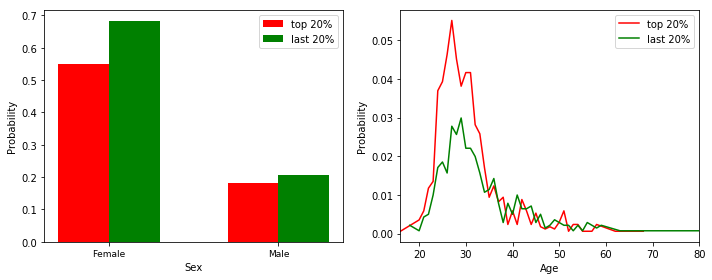

In [15]:
fig=plt.figure(figsize=(10,4),facecolor='white') 
ax=fig.add_subplot(1,2,1)
x=range(0,2)
x1=[i+0.3 for i in x]
plt.bar(x,high['sex'].value_counts()/len(high),width = .3,label='top 20%',color='red')
plt.bar(x1,low['sex'].value_counts()/len(low),width = .3,label='last 20%',color='green')
plt.xticks([i+0.15 for i in x],['Female','Male'],rotation=0,fontsize=9)
plt.xlabel('Sex')
plt.ylabel('Probability')
plt.legend()

ax=fig.add_subplot(1,2,2)
counts2=high['age'].value_counts()/len(high)
counts2=counts2.sort_index()
plt.xlabel('Age')
counts2.plot(color='red',label='top 20%')
counts1=low['age'].value_counts()/len(low)
counts1=counts1.sort_index()
plt.xlabel('Age')
plt.ylabel('Probability')
counts1.plot(color='green',label='last 20%')
plt.legend()
plt.tight_layout()
plt.savefig('./picture/select_user.png',dpi=100)
plt.show()

In [18]:
pd.DataFrame(list(high)).to_csv('./category/high.csv',index=False,header=False)
pd.DataFrame(list(low)).to_csv('./category/low.csv',index=False,header=False)

In [46]:
# 服务器

high=pd.read_csv('./category/high.csv',names=['user_id'])
users=high['user_id'].unique()
for user in users:
    path='./siteexample1/allusers0/'+str(user)+'.csv'
    if os.path.isfile(path)==True:    
        userdata=pd.read_csv(path,names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'])
        userdata.to_csv('./category/high_behavior.csv',header=False,mode='a+')

low=pd.read_csv('./category/low.csv',names=['user_id'])
users=low['user_id'].unique()
for user in users:
    path='./siteexample1/allusers_0'+str(user)+'.csv'
    #print(path)
    if os.path.isfile(path)==True:      
        userdata=pd.read_csv(path,names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'])
        userdata.to_csv('./category/low_behavior.csv',header=False,mode='a+')

In [5]:
high_behavior=pd.read_csv('./category/high_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'],index_col=0)
high_behavior=high_behavior[['user_id','app_type_name','start_time']]
high_behavior['date']=high_behavior['start_time'].map(lambda x: int(str(x)[6:8]))
high_behavior['hour']=high_behavior['start_time'].map(lambda x: int(str(x)[8:10]))
high_behavior=high_behavior[['user_id','app_type_name','date','hour']]

In [7]:
low_behavior=pd.read_csv('./category/low_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'],index_col=0)
low_behavior=low_behavior[['user_id','app_type_name','start_time']]

low_behavior['date']=low_behavior['start_time'].map(lambda x: int(str(x)[6:8]))
low_behavior['hour']=low_behavior['start_time'].map(lambda x: int(str(x)[8:10]))

low_behavior=low_behavior[['user_id','app_type_name','date','hour']]

In [8]:
high_date_count=high_behavior.groupby('user_id')['date'].nunique().reset_index()

In [9]:
high_overall=high_behavior.groupby(['user_id'])['hour'].value_counts().reset_index(name='count')

In [13]:
diction=dict(high_date_count[['user_id','date']].values)
high_overall['date']=high_overall['user_id'].apply(lambda x : diction[x]
                                                if x in diction
                                                else np.nan)

In [15]:
high_overall['high_number']=high_overall['count']/high_overall['date']

In [25]:
high_overall[['user_id','hour','high_number']]

,user_id,hour,high_number
0,1279786,12,61.444444
1,1279786,11,54.407407
2,1279786,7,52.777778
3,1279786,22,49.370370
4,1279786,13,48.481481
5,1279786,20,45.000000
6,1279786,10,40.000000
7,1279786,16,33.407407
8,1279786,18,30.962963
9,1279786,19,29.037037


In [4]:
high_date_count=high_behavior.groupby('user_id')['date'].nunique().reset_index()

high_overall=high_behavior.groupby(['user_id'])['hour'].value_counts().reset_index(name='count')

diction=dict(high_date_count[['user_id','date']].values)

high_overall['date']=high_overall['user_id'].apply(lambda x : diction[x]
                                                if x in diction
                                                else np.nan)

high_overall['high_number']=high_overall['count']/high_overall['date']

# *
high_all=high_overall.groupby('hour')['high_number'].mean().reset_index()
high_all['high_error']=high_overall.groupby('hour')['high_number'].sem().values

In [5]:
low_date_count=low_behavior.groupby('user_id')['date'].nunique().reset_index()

low_overall=low_behavior.groupby(['user_id'])['hour'].value_counts().reset_index(name='count')

diction=dict(low_date_count[['user_id','date']].values)

low_overall['date']=low_overall['user_id'].apply(lambda x : diction[x]
                                                if x in diction
                                                else np.nan)

low_overall['low_number']=low_overall['count']/low_overall['date']

low_all=low_overall.groupby('hour')['low_number'].mean().reset_index()
low_all['low_error']=low_overall.groupby('hour')['low_number'].sem().values

In [25]:
high_category_overall=high_behavior.groupby(['user_id','app_type_name'])['hour'].value_counts().reset_index(name='count')

diction=dict(high_date_count[['user_id','date']].values)
high_category_overall['date']=high_category_overall['user_id'].apply(lambda x : diction[x]
                                                if x in diction
                                                else np.nan)

high_category_overall['high_number']=high_category_overall['count']/high_category_overall['date']

high_category_all=high_category_overall.groupby(['app_type_name','hour'])['high_number'].mean().reset_index()

high_category_all['error']=high_category_overall.groupby(['app_type_name','hour'])['high_number'].sem().values

In [26]:
low_category_overall=low_behavior.groupby(['user_id','app_type_name'])['hour'].value_counts().reset_index(name='count')

diction=dict(low_date_count[['user_id','date']].values)
low_category_overall['date']=low_category_overall['user_id'].apply(lambda x : diction[x]
                                                if x in diction
                                                else np.nan)

low_category_overall['low_number']=low_category_overall['count']/low_category_overall['date']

low_category_all=low_category_overall.groupby(['app_type_name','hour'])['low_number'].mean().reset_index()

low_category_all['error']=low_category_overall.groupby(['app_type_name','hour'])['low_number'].sem().values

In [27]:
attention_category=pd.merge(high_category_all,low_category_all,on=['hour','app_type_name'])

In [28]:
attention_category['app_type_name'].unique()

array(['-9', '位置', '其他资讯', '应用商店', '房产', '招聘', '搜索', '支付', '旅游', '游戏',
       '生活服务', '电商购物', '社交沟通', '社区论坛', '网页浏览', '视频', '软件工具', '邮箱', '阅读',
       '音乐'], dtype=object)

In [29]:
attention_category

,app_type_name,hour,high_number,error_x,low_number,error_y
0,-9,0,6.357981,0.255661,6.215331,0.595745
1,-9,1,5.029267,0.227172,6.111845,1.181061
2,-9,2,4.279458,0.198732,4.736655,0.573025
3,-9,3,4.071020,0.209929,4.457810,0.635915
4,-9,4,3.874748,0.192706,4.461301,0.584966
5,-9,5,3.792014,0.176414,4.327300,0.466615
6,-9,6,5.337273,0.687972,5.030168,0.374248
7,-9,7,7.683927,0.249707,6.998614,0.364290
8,-9,8,11.128030,0.310387,7.916135,0.412563
9,-9,9,12.090957,0.378936,8.387671,0.456558


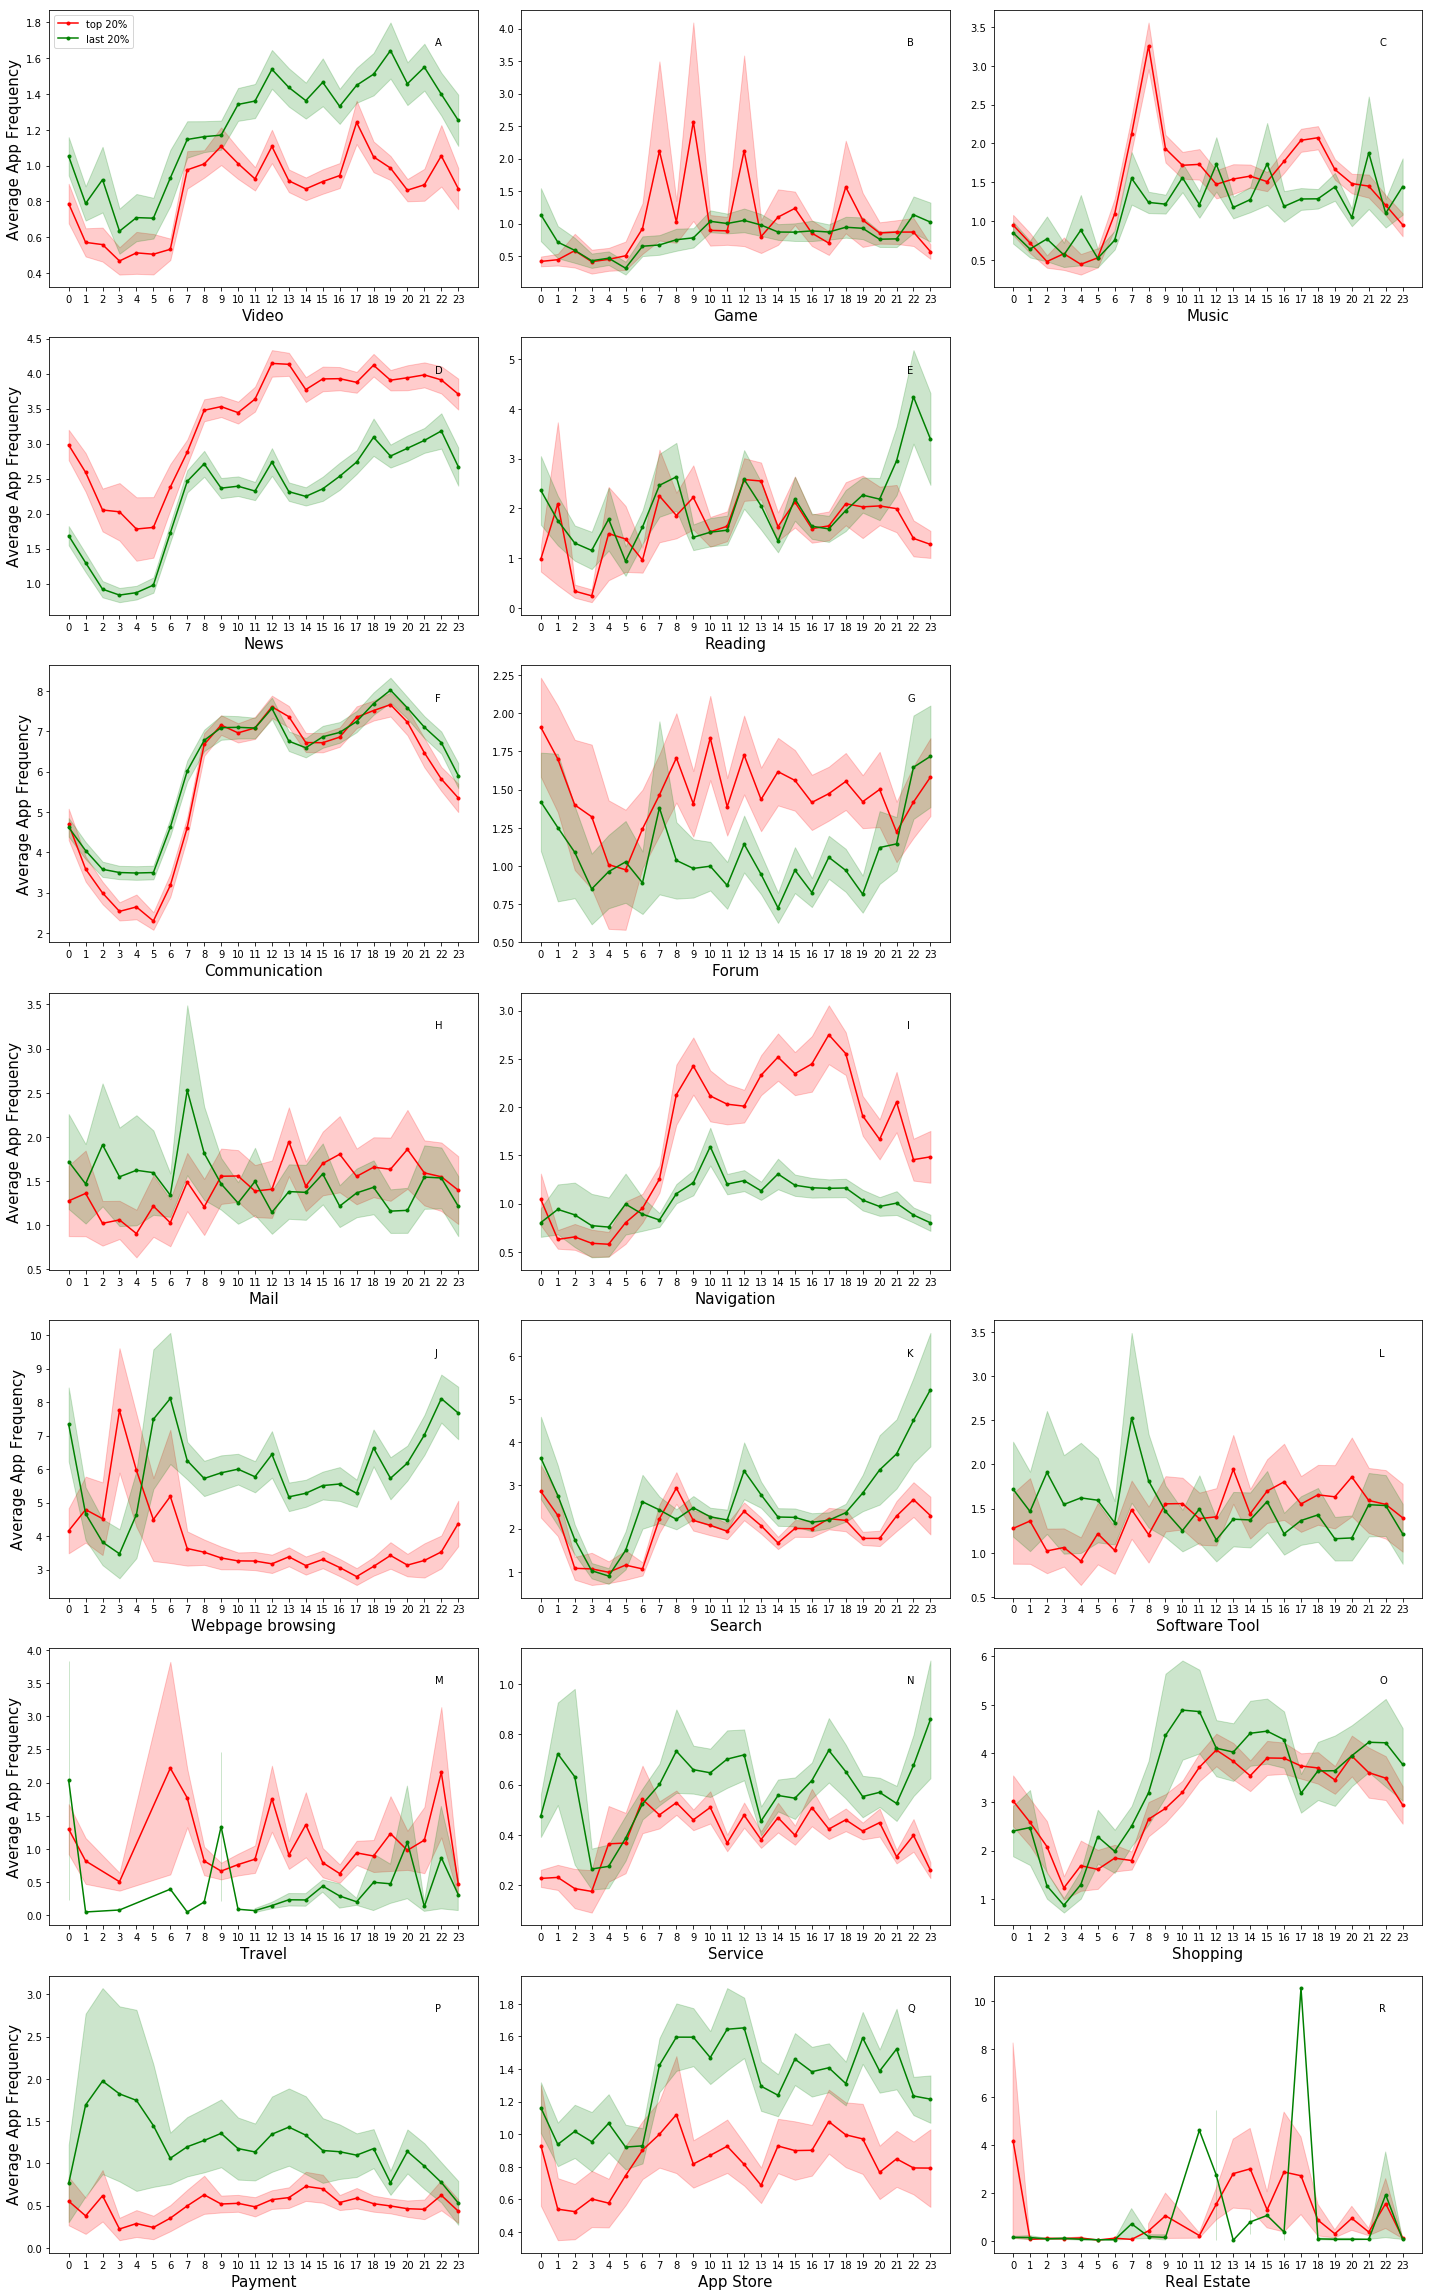

In [30]:
fig = plt.figure(figsize=(20, 32),facecolor='white')

ax = fig.add_subplot(731)
x=attention_category[attention_category['app_type_name']=='视频']['high_number'].values
y=attention_category[attention_category['app_type_name']=='视频']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='视频']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='视频']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.legend(loc='upper left')
plt.xlabel('Video',size=15)
plt.ylabel('Average App Frequency',size=15)


ax = fig.add_subplot(7,3,2)
x=attention_category[attention_category['app_type_name']=='游戏']['high_number'].values
y=attention_category[attention_category['app_type_name']=='游戏']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='游戏']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='游戏']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Game',size=15)

ax = fig.add_subplot(7,3,3)
x=attention_category[attention_category['app_type_name']=='音乐']['high_number'].values
y=attention_category[attention_category['app_type_name']=='音乐']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='音乐']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='音乐']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'C',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Music',size=15)

ax = fig.add_subplot(7, 3, 4)
x=attention_category[attention_category['app_type_name']=='其他资讯']['high_number'].values
y=attention_category[attention_category['app_type_name']=='其他资讯']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='其他资讯']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='其他资讯']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'D',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('News',size=15)
plt.ylabel('Average App Frequency',size=15)

ax = fig.add_subplot(7, 3, 5)
x=attention_category[attention_category['app_type_name']=='阅读']['high_number'].values
y=attention_category[attention_category['app_type_name']=='阅读']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='阅读']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='阅读']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'E',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Reading',size=15)


ax = fig.add_subplot(737)
x=attention_category[attention_category['app_type_name']=='社交沟通']['high_number'].values
y=attention_category[attention_category['app_type_name']=='社交沟通']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='社交沟通']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='社交沟通']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'F',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Communication',size=15)
plt.ylabel('Average App Frequency',size=15)

ax = fig.add_subplot(7,3,8)
x=attention_category[attention_category['app_type_name']=='社区论坛']['high_number'].values
y=attention_category[attention_category['app_type_name']=='社区论坛']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='社区论坛']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='社区论坛']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'G',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Forum',size=15)

ax = fig.add_subplot(7,3,10)
x=attention_category[attention_category['app_type_name']=='邮箱']['high_number'].values
y=attention_category[attention_category['app_type_name']=='邮箱']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='邮箱']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='邮箱']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'H',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Mail',size=15)
plt.ylabel('Average App Frequency',size=15)

ax = fig.add_subplot(7, 3, 11)
x=attention_category[attention_category['app_type_name']=='位置']['high_number'].values
y=attention_category[attention_category['app_type_name']=='位置']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='位置']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='位置']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'I',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Navigation',size=15)


ax = fig.add_subplot(7, 3, 13)
x=attention_category[attention_category['app_type_name']=='网页浏览']['high_number'].values
y=attention_category[attention_category['app_type_name']=='网页浏览']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='网页浏览']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='网页浏览']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'J',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Webpage browsing',size=15)
plt.ylabel('Average App Frequency',size=15)

ax = fig.add_subplot(7,3,14)
x=attention_category[attention_category['app_type_name']=='搜索']['high_number'].values
y=attention_category[attention_category['app_type_name']=='搜索']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='搜索']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='搜索']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'K',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Search',size=15)


ax = fig.add_subplot(7, 3, 15)
x=attention_category[attention_category['app_type_name']=='邮箱']['high_number'].values
y=attention_category[attention_category['app_type_name']=='邮箱']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='邮箱']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='邮箱']['error_y'].values
plt.plot(range(0,24,1),x,'.-',color='r',label='top 20%')
plt.plot(range(0,24,1),y,'.-',color='g',label='last 20%')
plt.fill_between(range(0,24,1),np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(range(0,24,1),np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'L',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Software Tool',size=15)


ax = fig.add_subplot(7, 3, 16)
x=attention_category[attention_category['app_type_name']=='旅游']['high_number'].values
y=attention_category[attention_category['app_type_name']=='旅游']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='旅游']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='旅游']['error_y'].values
plt.plot(attention_category[attention_category['app_type_name']=='旅游']['hour'].values,x,'.-',color='r',label='top 20%')
plt.plot(attention_category[attention_category['app_type_name']=='旅游']['hour'].values,y,'.-',color='g',label='last 20%')
plt.fill_between(attention_category[attention_category['app_type_name']=='旅游']['hour'].values,np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(attention_category[attention_category['app_type_name']=='旅游']['hour'].values,np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'M',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Travel',size=15)
plt.ylabel('Average App Frequency',size=15)

ax = fig.add_subplot(7, 3, 17)
x=attention_category[attention_category['app_type_name']=='生活服务']['high_number'].values
y=attention_category[attention_category['app_type_name']=='生活服务']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='生活服务']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='生活服务']['error_y'].values
plt.plot(attention_category[attention_category['app_type_name']=='生活服务']['hour'].values,x,'.-',color='r',label='top 20%')
plt.plot(attention_category[attention_category['app_type_name']=='生活服务']['hour'].values,y,'.-',color='g',label='last 20%')
plt.fill_between(attention_category[attention_category['app_type_name']=='生活服务']['hour'].values,np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(attention_category[attention_category['app_type_name']=='生活服务']['hour'].values,np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'N',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Service',size=15)

ax = fig.add_subplot(7, 3, 18)
x=attention_category[attention_category['app_type_name']=='电商购物']['high_number'].values
y=attention_category[attention_category['app_type_name']=='电商购物']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='电商购物']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='电商购物']['error_y'].values
plt.plot(attention_category[attention_category['app_type_name']=='电商购物']['hour'].values,x,'.-',color='r',label='top 20%')
plt.plot(attention_category[attention_category['app_type_name']=='电商购物']['hour'].values,y,'.-',color='g',label='last 20%')
plt.fill_between(attention_category[attention_category['app_type_name']=='电商购物']['hour'].values,np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(attention_category[attention_category['app_type_name']=='电商购物']['hour'].values,np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'O',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Shopping',size=15)


ax = fig.add_subplot(7, 3, 19)
x=attention_category[attention_category['app_type_name']=='支付']['high_number'].values
y=attention_category[attention_category['app_type_name']=='支付']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='支付']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='支付']['error_y'].values
plt.plot(attention_category[attention_category['app_type_name']=='支付']['hour'].values,x,'.-',color='r',label='top 20%')
plt.plot(attention_category[attention_category['app_type_name']=='支付']['hour'].values,y,'.-',color='g',label='last 20%')
plt.fill_between(attention_category[attention_category['app_type_name']=='支付']['hour'].values,np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(attention_category[attention_category['app_type_name']=='支付']['hour'].values,np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'P',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Payment',size=15)
plt.ylabel('Average App Frequency',size=15)

ax = fig.add_subplot(7,3,20)
x=attention_category[attention_category['app_type_name']=='应用商店']['high_number'].values
y=attention_category[attention_category['app_type_name']=='应用商店']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='应用商店']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='应用商店']['error_y'].values
plt.plot(attention_category[attention_category['app_type_name']=='应用商店']['hour'].values,x,'.-',color='r',label='top 20%')
plt.plot(attention_category[attention_category['app_type_name']=='应用商店']['hour'].values,y,'.-',color='g',label='last 20%')
plt.fill_between(attention_category[attention_category['app_type_name']=='应用商店']['hour'].values,np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(attention_category[attention_category['app_type_name']=='应用商店']['hour'].values,np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'Q',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('App Store',size=15)


ax = fig.add_subplot(7,3,21)
x=attention_category[attention_category['app_type_name']=='房产']['high_number'].values
y=attention_category[attention_category['app_type_name']=='房产']['low_number'].values
error_x=attention_category[attention_category['app_type_name']=='房产']['error_x'].values
error_y=attention_category[attention_category['app_type_name']=='房产']['error_y'].values
plt.plot(attention_category[attention_category['app_type_name']=='房产']['hour'].values,x,'.-',color='r',label='top 20%')
plt.plot(attention_category[attention_category['app_type_name']=='房产']['hour'].values,y,'.-',color='g',label='last 20%')
plt.fill_between(attention_category[attention_category['app_type_name']=='房产']['hour'].values,np.array(x)-np.array(error_x),np.array(x)+np.array(error_x),alpha=0.2,color='red')
plt.fill_between(attention_category[attention_category['app_type_name']=='房产']['hour'].values,np.array(y)-np.array(error_y),np.array(y)+np.array(error_y),alpha=0.2,color='green')
ax.text(0.9, 0.9,'R',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.xticks(range(0,24,1))
plt.xlabel('Real Estate',size=15)

plt.tight_layout()
plt.savefig('./picture/lifestyle.png',dpi=100)
plt.show()

In [86]:
attention=pd.merge(high_all,low_all,on='hour')

In [87]:
attention

,hour,high_number,high_error,low_number,low_error
0,0,12.936279,0.625031,15.672364,0.936749
1,1,8.847117,0.480043,13.050529,1.342563
2,2,6.621977,0.335472,9.982363,0.724919
3,3,5.808355,0.309164,8.925995,0.673393
4,4,5.428944,0.288959,9.173828,0.670558
5,5,5.480301,0.290120,10.294897,0.735498
6,6,8.938004,0.800525,14.168286,0.826456
7,7,15.649916,0.560580,19.276506,0.699056
8,8,24.808663,0.722593,21.221195,0.773193
9,9,26.489162,0.743004,22.408985,0.893143


In [99]:
low_behavior=pd.read_csv('./category/low_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'],index_col=0)
low_behavior=low_behavior[['user_id','latitude','longtitude','start_time']]
low_behavior['location']=low_behavior['latitude'].astype('str')+','+low_behavior['longtitude'].astype('str')
low_behavior=low_behavior[['user_id','location','start_time']]
low_behavior=low_behavior.drop_duplicates()

low_behavior['date']=low_behavior['start_time'].apply(lambda x: int(str(x)[6:8]))
low_behavior['hour']=low_behavior['start_time'].apply(lambda x: int(str(x)[8:10]))

low_behavior=low_behavior[['user_id','location','date','hour']]
low_behavior=low_behavior.drop_duplicates()

low_behavior = low_behavior[low_behavior['location'].astype('str') != 'nan,nan'] 

In [101]:
low_date_count=low_behavior.groupby('user_id')['date'].nunique().reset_index()

low_overall=low_behavior.groupby(['user_id'])['hour'].value_counts().reset_index(name='count')

diction=dict(low_date_count[['user_id','date']].values)

low_overall['date']=low_overall['user_id'].apply(lambda x : diction[x]
                                                if x in diction
                                                else np.nan)

low_overall['low_number']=low_overall['count']/low_overall['date']

low_all=low_overall.groupby('hour')['low_number'].mean().reset_index()
low_all['low_error']=low_overall.groupby('hour')['low_number'].sem().values

In [100]:
high_behavior=pd.read_csv('./category/high_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'],index_col=0)
high_behavior=high_behavior[['user_id','latitude','longtitude','start_time']]
high_behavior['location']=high_behavior['latitude'].astype('str')+','+high_behavior['longtitude'].astype('str')
high_behavior=high_behavior[['user_id','location','start_time']]
high_behavior=high_behavior.drop_duplicates()

high_behavior['date']=high_behavior['start_time'].apply(lambda x: int(str(x)[6:8]))
high_behavior['hour']=high_behavior['start_time'].apply(lambda x: int(str(x)[8:10]))

high_behavior=high_behavior[['user_id','location','date','hour']]
high_behavior=high_behavior.drop_duplicates()

high_behavior = high_behavior[high_behavior['location'].astype('str') != 'nan,nan']

In [102]:
high_date_count=high_behavior.groupby('user_id')['date'].nunique().reset_index()

high_overall=high_behavior.groupby(['user_id'])['hour'].value_counts().reset_index(name='count')

diction=dict(high_date_count[['user_id','date']].values)

high_overall['date']=high_overall['user_id'].apply(lambda x : diction[x]
                                                if x in diction
                                                else np.nan)

high_overall['high_number']=high_overall['count']/high_overall['date']

high_all=high_overall.groupby('hour')['high_number'].mean().reset_index()
high_all['high_error']=high_overall.groupby('hour')['high_number'].sem().values

In [103]:
location=pd.merge(high_all,low_all,on='hour')

In [107]:
location

,hour,high_number,high_error,low_number,low_error
0,0,0.544904,0.009217,0.373654,0.010707
1,1,0.500629,0.008772,0.330861,0.009688
2,2,0.486557,0.008925,0.312939,0.009327
3,3,0.476258,0.008563,0.311757,0.009356
4,4,0.470891,0.008390,0.305614,0.009374
5,5,0.469903,0.008471,0.322803,0.009497
6,6,0.518198,0.010166,0.433671,0.013335
7,7,0.714256,0.013677,0.698730,0.018977
8,8,0.868265,0.015175,0.718062,0.018927
9,9,0.794569,0.012446,0.685326,0.016601


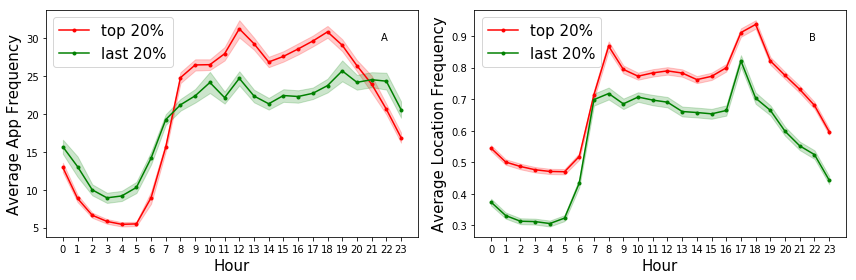

In [133]:
fig = plt.figure(figsize=(12, 4),facecolor='white')

ax = fig.add_subplot(121)
x=range(0,24)
plt.plot(x,attention['high_number'].values,'.-',label='top 20%',color='red')
plt.plot(x,attention['low_number'].values,'.-',label='last 20%',color='green')
plt.fill_between(x,np.array(attention['high_number'])-np.array(attention['high_error']),np.array(attention['high_number'])+np.array(attention['high_error']),alpha=0.2,color='red')
plt.fill_between(x,np.array(attention['low_number'])-np.array(attention['low_error']),np.array(attention['low_number'])+np.array(attention['low_error']),alpha=0.2,color='green')
plt.legend(fontsize=15)
plt.xticks(x,)
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Average App Frequency',fontsize=15)
ax.text(0.9, 0.9,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax = fig.add_subplot(122)
x=range(0,24)
plt.plot(x,location['high_number'].values,'.-',label='top 20%',color='red')
plt.plot(x,location['low_number'].values,'.-',label='last 20%',color='green')
plt.fill_between(x,np.array(location['high_number'])-np.array(location['high_error']),np.array(location['high_number'])+np.array(location['high_error']),alpha=0.2,color='red')
plt.fill_between(x,np.array(location['low_number'])-np.array(location['low_error']),np.array(location['low_number'])+np.array(location['low_error']),alpha=0.2,color='green')
plt.legend(fontsize=15)
plt.xticks(x,)
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Average Location Frequency',fontsize=15)
ax.text(0.9, 0.9,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

plt.tight_layout()
plt.savefig('./picture/schedule.png',dpi=100)
plt.show()

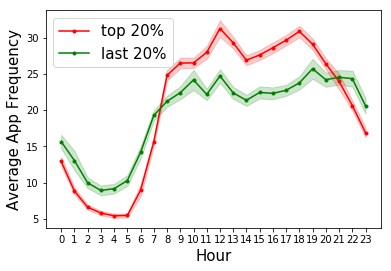

In [117]:
x=range(0,24)
plt.plot(x,attention['high_number'].values,'.-',label='top 20%',color='red')
plt.plot(x,attention['low_number'].values,'.-',label='last 20%',color='green')
plt.fill_between(x,np.array(attention['high_number'])-np.array(attention['high_error']),np.array(attention['high_number'])+np.array(attention['high_error']),alpha=0.2,color='red')
plt.fill_between(x,np.array(attention['low_number'])-np.array(attention['low_error']),np.array(attention['low_number'])+np.array(attention['low_error']),alpha=0.2,color='green')
plt.legend(fontsize=15)
plt.xticks(x,)
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Average App Frequency',fontsize=15)
plt.savefig('./picture/schedule1.png',dpi=100)
plt.show()

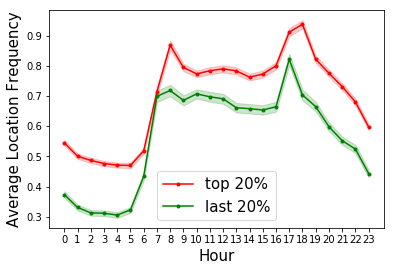

In [132]:
x=range(0,24)
plt.plot(x,location['high_number'].values,'.-',label='top 20%',color='red')
plt.plot(x,location['low_number'].values,'.-',label='last 20%',color='green')
plt.fill_between(x,np.array(location['high_number'])-np.array(location['high_error']),np.array(location['high_number'])+np.array(location['high_error']),alpha=0.2,color='red')
plt.fill_between(x,np.array(location['low_number'])-np.array(location['low_error']),np.array(location['low_number'])+np.array(location['low_error']),alpha=0.2,color='green')
plt.legend(fontsize=15)
plt.xticks(x,)
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Average Location Frequency',fontsize=15)
# ax.text(0.9, 0.9,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

# plt.tight_layout()
plt.savefig('./picture/schedule2.png',dpi=100)
plt.show()

In [149]:
category_high=pd.read_csv('./category/high_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'],index_col=0)
category_high=category_high[['user_id','app_name','app_type_name']]
category_high=category_high.drop_duplicates()

In [159]:
high_overall=category_high.groupby(['user_id'])['app_type_name'].value_counts().reset_index(name='count')
high_all=high_overall.groupby('app_type_name')['count'].mean().reset_index()
high_all['high_error']=high_overall.groupby('app_type_name')['count'].sem().values

In [162]:
category_low=pd.read_csv('./category/low_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'],index_col=0)
category_low=category_low[['user_id','app_name','app_type_name']]
category_low=category_low.drop_duplicates()

In [163]:
low_overall=category_low.groupby(['user_id'])['app_type_name'].value_counts().reset_index(name='count')
low_all=low_overall.groupby('app_type_name')['count'].mean().reset_index()
low_all['low_error']=low_overall.groupby('app_type_name')['count'].sem().values

In [168]:
attention=pd.merge(high_all,low_all,on=['app_type_name'])

In [170]:
attention=attention[attention['app_type_name']!='-9']
attention

,app_type_name,count_x,high_error,count_y,low_error
1,位置,1.679522,0.028659,1.811578,0.031448
2,其他资讯,1.837623,0.023162,1.665560,0.025673
3,应用商店,1.230552,0.019170,1.750575,0.030404
4,房产,1.040000,0.040000,1.000000,0.000000
5,招聘,1.000000,0.000000,1.000000,0.000000
6,搜索,1.000000,0.000000,1.000000,0.000000
7,支付,1.100000,0.013584,1.083744,0.019490
8,旅游,1.170455,0.035532,1.069767,0.039310
9,游戏,1.191882,0.026147,1.353623,0.036355
10,生活服务,1.290729,0.016286,1.235669,0.020103


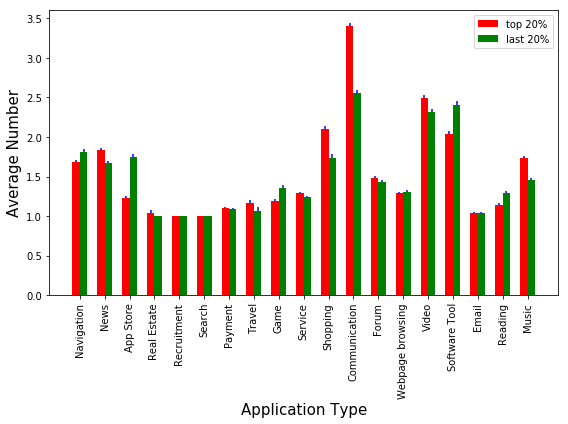

In [184]:
fig = plt.figure(figsize=(8, 6),facecolor='white')
x=range(0,len(attention))
x1=[i+0.3 for i in x]
plt.bar(x,attention['count_x'].values,label='top 20%',width=0.3,color='red')
plt.errorbar(x, attention['count_x'].values, attention['high_error'], zorder=0, fmt="none",marker="none",color='b')
plt.bar(x1,attention['count_y'].values,label='last 20%',width=0.3,color='green')
plt.errorbar(x1, attention['count_y'].values, attention['low_error'], zorder=0, fmt="none",marker="none",color='b')
plt.legend(fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.xticks([i+0.15 for i in x],['Navigation','News','App Store','Real Estate','Recruitment','Search','Payment',
              'Travel','Game','Service','Shopping','Communication','Forum','Webpage browsing',
              'Video','Software Tool','Email', 'Reading','Music'])
plt.xlabel('Application Type',fontsize=15)
plt.ylabel('Average Number',fontsize=15)

plt.tight_layout()
plt.savefig("./picture/need.png", dpi=100)
plt.show()

In [189]:
category=pd.read_csv('./category/high_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'],index_col=0)
category=category[['app_name','app_type_name']]
category.groupby('app_type_name')['app_name'].unique()

app_type_name
-9                                                   [其他]
位置      [移动手机导航, 百度地图, 迷你地图, 搜搜地图, 谷歌地图, 小米司机, 图吧地图, 高...
其他资讯    [手机腾讯网, 百度新闻, 今日头条, 掌中新浪, 移动手机证券大智慧版, 同花顺炒股, 凤...
应用商店    [应用宝, 安卓市场, 移动MM, 沃商店, 乐商店, 机锋市场, App123, N多市场...
房产                                      [好租租房, 链家, 365搜房]
招聘                                                 [前程无忧]
搜索                                                 [掌上百度]
支付      [支付宝, 招商银行, 建行手机银行, 交通银行, 浦发银行, 兴业银行, 广发银行, 移动...
旅游      [去哪儿旅行, 携程无线, 航班管家, 盛名列车时刻, 酷讯移动, 超级火车票, 航旅纵横,...
游戏      [移动游戏大厅, 神庙逃亡, 三国杀掌上游戏, QQ欢乐斗地主, 愤怒的小鸟, 地铁跑酷, ...
生活服务    [我查查, 91黄历天气, 雅虎天气, 移动掌上营业厅, 墨迹天气, 天气通, 8684公交...
电商购物    [淘宝网, 天猫, 大众点评, 58同城, 赶集网/赶集生活, 京东商城, 1号店, 美团,...
社交沟通    [QQ, 微信, 阿里旺旺, 新浪微博, 爱聊, 米聊, 飞信, 来往, 陌陌, 易信, G...
社区论坛    [QQ空间, 人人网, 百度贴吧, Weico, 街旁, 开心网, 糗百, 朋友网, Pat...
网页浏览    [UC浏览器, SAFARI浏览器, QQ浏览器, 火狐浏览器, 360安全浏览器, 百度浏...
视频      [QQLive, 优酷视频, QVOD快播, 奇艺高清影视, PPS影音, 土豆视频, 乐视...
软件工具    [91助手, 360安全卫士, 搜狗输入法, POCO美人相机, 百度输入法, 美图秀秀, ...


# basename_except with all-users category

In [111]:
basename_except=pd.read_csv('./basename_except.csv')

house_attention=pd.read_csv('./category/house_attention.csv')
house_location=pd.read_csv('./category/house_location.csv')

names=['median','pertentile_10']
for n in names:
    diction=dict(house_attention[['user_id',n]].values)
    basename_except['att_'+n]=basename_except['user_id'].apply(lambda x: diction[x]
                                                              if x in diction
                                                               else np.nan)

names=['median','pertentile_10']
for n in names:
    diction=dict(house_location[['user_id',n]].values)
    basename_except['loc_'+n]=basename_except['user_id'].apply(lambda x: diction[x]
                                                              if x in diction
                                                               else np.nan)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
att_median=basename_except['att_median'].median()
loc_median=basename_except['loc_median'].median()

In [113]:
high_low=basename_except[(basename_except['att_median']>att_median)&(basename_except['loc_median']<=loc_median)].index
basename_except.ix[high_low,'category']='high_low'

low_low=basename_except[(basename_except['att_median']<=att_median)&(basename_except['loc_median']<=loc_median)].index
basename_except.ix[low_low,'category']='low_low'

low_high=basename_except[(basename_except['att_median']<=att_median)&(basename_except['loc_median']>loc_median)].index
basename_except.ix[low_high,'category']='low_high'

high_high=basename_except[(basename_except['att_median']>att_median)&(basename_except['loc_median']>loc_median)].index
basename_except.ix[high_high,'category']='high_high'

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [115]:
apple=basename_except[basename_except['brand_chn']=='苹果']
print(len(apple[apple.category=='low_high'])/len(apple))
print(len(apple[apple.category=='low_low'])/len(apple))
print(len(apple[apple.category=='high_high'])/len(apple))
print(len(apple[apple.category=='high_low'])/len(apple))

0.09297362593114557
0.084437286088182
0.2156633782967586
0.17704852023354137


In [215]:
highest_house=basename_except.sort_values(by=['house_price'],ascending=False)[:int(len(house)*0.10)]
print(len(highest_house[highest_house.category=='low_high'])/len(basename_except[basename_except.category=='low_high']))
print(len(highest_house[highest_house.category=='low_low'])/len(basename_except[basename_except.category=='low_low']))
print(len(highest_house[highest_house.category=='high_high'])/len(basename_except[basename_except.category=='high_high']))
print(len(highest_house[highest_house.category=='high_low'])/len(basename_except[basename_except.category=='high_low']))

0.08358786397882305
0.11112103617686467
0.0939106901217862
0.11569488410088839


In [216]:
highest_house=basename_except.sort_values(by=['house_price'],ascending=False)[:int(len(house)*0.20)]
print(len(highest_house[highest_house.category=='low_high'])/len(basename_except[basename_except.category=='low_high']))
print(len(highest_house[highest_house.category=='low_low'])/len(basename_except[basename_except.category=='low_low']))
print(len(highest_house[highest_house.category=='high_high'])/len(basename_except[basename_except.category=='high_high']))
print(len(highest_house[highest_house.category=='high_low'])/len(basename_except[basename_except.category=='high_low']))

0.17827326410099775
0.2150960250111657
0.18655841226883174
0.2321045644848361


In [217]:
highest_house=basename_except.sort_values(by=['house_price'],ascending=False)[:int(len(house)*0.30)]
print(len(highest_house[highest_house.category=='low_high'])/len(basename_except[basename_except.category=='low_high']))
print(len(highest_house[highest_house.category=='low_low'])/len(basename_except[basename_except.category=='low_low']))
print(len(highest_house[highest_house.category=='high_high'])/len(basename_except[basename_except.category=='high_high']))
print(len(highest_house[highest_house.category=='high_low'])/len(basename_except[basename_except.category=='high_low']))

0.27071879454286296
0.3135328271549799
0.28949030221019395
0.34504237720820996


In [218]:
highest_house=basename_except.sort_values(by=['house_price'],ascending=False)[:int(len(house)*0.40)]
print(len(highest_house[highest_house.category=='low_high'])/len(basename_except[basename_except.category=='low_high']))
print(len(highest_house[highest_house.category=='low_low'])/len(basename_except[basename_except.category=='low_low']))
print(len(highest_house[highest_house.category=='high_high'])/len(basename_except[basename_except.category=='high_high']))
print(len(highest_house[highest_house.category=='high_low'])/len(basename_except[basename_except.category=='high_low']))

0.3659132559560171
0.42242072353729343
0.38908434821831306
0.4466455631573573


In [219]:
highest_house=basename_except.sort_values(by=['house_price'],ascending=False)[:int(len(house)*0.50)]
print(len(highest_house[highest_house.category=='low_high'])/len(basename_except[basename_except.category=='low_high']))
print(len(highest_house[highest_house.category=='low_low'])/len(basename_except[basename_except.category=='low_low']))
print(len(highest_house[highest_house.category=='high_high'])/len(basename_except[basename_except.category=='high_high']))
print(len(highest_house[highest_house.category=='high_low'])/len(basename_except[basename_except.category=='high_low']))

0.4674200773773162
0.5220187583742742
0.49174560216508795
0.5494741141631778


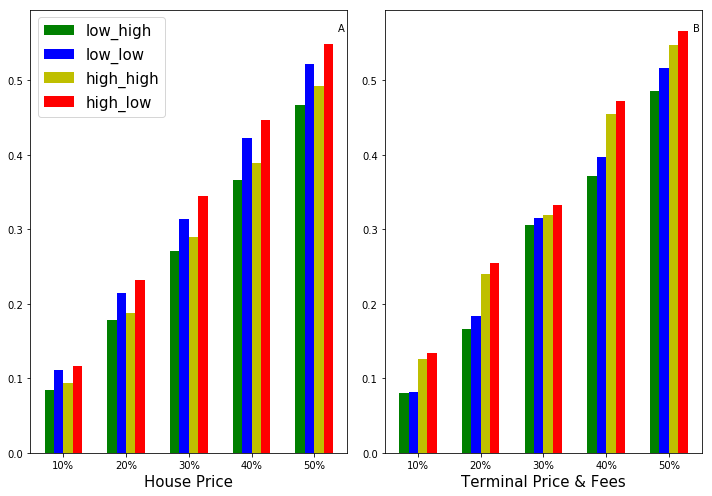

In [272]:
fig = plt.figure(figsize=(10,7),facecolor='white')

ax = fig.add_subplot(121)
x=range(0,10,2)
plt.bar(x,[0.084,0.178,0.271,0.366,0.467],width=0.3,label='low_high',color='g')
plt.bar([i+0.3 for i in x],[0.111,0.215,0.314,0.422,0.522],width=0.3,label='low_low',color='b')
plt.bar([i+0.6 for i in x],[0.094,0.187,0.289,0.389,0.492],width=0.3,label='high_high',color='y')
plt.bar([i+0.9 for i in x],[0.116,0.232,0.345,0.447,0.549],width=0.3,label='high_low',color='r')

plt.legend(fontsize=15)
# plt.yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65],)
plt.xticks([i+0.45 for i in x],['10%','20%','30%','40%','50%'])
plt.xlabel('Probability',fontsize=15)
plt.xlabel('House Price',fontsize=15)
ax.text(0.97, 0.97,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax1 = fig.add_subplot(122,sharey=ax)
plt.bar(x,[0.080,0.166,0.306,0.371,0.485],width=0.3,label='low_high',color='g')
plt.bar([i+0.3 for i in x],[0.081,0.184,0.315,0.397,0.516],width=0.3,label='low_low',color='b')
plt.bar([i+0.6 for i in x],[0.126,0.240,0.319,0.454,0.547],width=0.3,label='high_high',color='y')
plt.bar([i+0.9 for i in x],[0.134,0.255,0.332,0.472,0.566],width=0.3,label='high_low',color='r')
plt.xticks([i+0.45 for i in x],['10%','20%','30%','40%','50%'])
plt.xlabel('Terminal Price & Fees',fontsize=15)
ax1.text(0.97, 0.97,'B',horizontalalignment='left',verticalalignment='top',transform=ax1.transAxes)

plt.tight_layout()
plt.savefig('./picture/category.png',dpi=100)
plt.show()

In [221]:
zscore_category_attention=pd.read_csv('./category/all_attention.csv')
zscore_category_location=pd.read_csv('./category/all_location.csv')
basename_except1=pd.read_csv('./basename_except.csv')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [223]:
names=['median','pertentile_10']
for n in names:
    diction=dict(zscore_category_attention[['user_id',n]].values)
    basename_except1['att_'+n]=basename_except1['user_id'].apply(lambda x: diction[x]
                                                              if x in diction
                                                               else np.nan)

names=['median','pertentile_10']
for n in names:
    diction=dict(zscore_category_location[['user_id',n]].values)
    basename_except1['loc_'+n]=basename_except1['user_id'].apply(lambda x: diction[x]
                                                              if x in diction
                                                               else np.nan)

att_median=basename_except1['att_median'].median()
loc_median=basename_except1['loc_median'].median()

high_low=basename_except1[(basename_except1['att_median']>att_median)&(basename_except1['loc_median']<=loc_median)].index
basename_except1.ix[high_low,'category']='high_low'

low_low=basename_except1[(basename_except1['att_median']<=att_median)&(basename_except1['loc_median']<=loc_median)].index
basename_except1.ix[low_low,'category']='low_low'

low_high=basename_except1[(basename_except1['att_median']<=att_median)&(basename_except1['loc_median']>loc_median)].index
basename_except1.ix[low_high,'category']='low_high'

high_high=basename_except1[(basename_except1['att_median']>att_median)&(basename_except1['loc_median']>loc_median)].index
basename_except1.ix[high_high,'category']='high_high'

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [224]:
# terminal=basename_except1[basename_except1['terminal_price'].astype('str')!='nan']

# highest_terminal=terminal.sort_values(by=['terminal_price'],ascending=False)[:int(len(terminal)*0.50)]
# print(len(highest_terminal[highest_terminal.category=='low_high'])/len(terminal[terminal.category=='low_high']))
# print(len(highest_terminal[highest_terminal.category=='low_low'])/len(terminal[terminal.category=='low_low']))
# print(len(highest_terminal[highest_terminal.category=='high_high'])/len(terminal[terminal.category=='high_high']))
# print(len(highest_terminal[highest_terminal.category=='high_low'])/len(terminal[terminal.category=='high_low']))

In [232]:
fees=basename_except1[basename_except1['fees'].astype('str')!='nan']

In [238]:
highest_fees=fees.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(fees)*0.10)]
print(len(highest_fees[highest_fees.category=='low_high'])/len(fees[fees.category=='low_high']))
print(len(highest_fees[highest_fees.category=='low_low'])/len(fees[fees.category=='low_low']))
print(len(highest_fees[highest_fees.category=='high_high'])/len(fees[fees.category=='high_high']))
print(len(highest_fees[highest_fees.category=='high_low'])/len(fees[fees.category=='high_low']))

0.080453135146836
0.08084508762288575
0.12632786093674553
0.13373682155408043


In [239]:
highest_fees=fees.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(fees)*0.20)]
print(len(highest_fees[highest_fees.category=='low_high'])/len(fees[fees.category=='low_high']))
print(len(highest_fees[highest_fees.category=='low_low'])/len(fees[fees.category=='low_low']))
print(len(highest_fees[highest_fees.category=='high_high'])/len(fees[fees.category=='high_high']))
print(len(highest_fees[highest_fees.category=='high_low'])/len(fees[fees.category=='high_low']))

0.1659571397647738
0.18397752946205043
0.23992032834379526
0.2551737602499024


In [240]:
highest_fees=fees.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(fees)*0.30)]
print(len(highest_fees[highest_fees.category=='low_high'])/len(fees[fees.category=='low_high']))
print(len(highest_fees[highest_fees.category=='low_low'])/len(fees[fees.category=='low_low']))
print(len(highest_fees[highest_fees.category=='high_high'])/len(fees[fees.category=='high_high']))
print(len(highest_fees[highest_fees.category=='high_low'])/len(fees[fees.category=='high_low']))

0.30550544772350097
0.3151370824937412
0.31941091260260746
0.33177144344657034


In [241]:
highest_fees=fees.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(fees)*0.40)]
print(len(highest_fees[highest_fees.category=='low_high'])/len(fees[fees.category=='low_high']))
print(len(highest_fees[highest_fees.category=='low_low'])/len(fees[fees.category=='low_low']))
print(len(highest_fees[highest_fees.category=='high_high'])/len(fees[fees.category=='high_high']))
print(len(highest_fees[highest_fees.category=='high_low'])/len(fees[fees.category=='high_low']))

0.3710945955696659
0.39702021127190573
0.45358522452921296
0.4718859820382663


In [242]:
highest_fees=fees.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(fees)*0.50)]
print(len(highest_fees[highest_fees.category=='low_high'])/len(fees[fees.category=='low_high']))
print(len(highest_fees[highest_fees.category=='low_low'])/len(fees[fees.category=='low_low']))
print(len(highest_fees[highest_fees.category=='high_high'])/len(fees[fees.category=='high_high']))
print(len(highest_fees[highest_fees.category=='high_low'])/len(fees[fees.category=='high_low']))

0.4849556245039325
0.5160285766623923
0.5472597778850796
0.5660549264610178


# regression for high&low

In [3]:
basename_except=pd.read_csv('./basename_except.csv')

house=basename_except[basename_except['house_price'].astype('str')!='nan']
terminal=basename_except[basename_except['terminal_price'].astype('str')!='nan']



high_house=house.sort_values(by=['house_price'],ascending=False)[:int(len(house)*0.20)]['user_id'].values
high_terminal=terminal.sort_values(by=['terminal_price'],ascending=False)[:int(len(terminal)*0.20)]['user_id'].values
# high_fees=fees.sort_values(by=['fees'],ascending=False)[:int(len(fees)*0.50)]['user_id'].values

high=set(high_house)&set(high_terminal)#&set(high_fees)

high_df=basename_except.loc[basename_except['user_id'].isin(high)].index

basename_except.ix[high_df,'type']=0



# len(high)

low_house=house.sort_values(by=['house_price'],ascending=False)[int(len(house)*0.80):-1]['user_id'].values
low_terminal=terminal.sort_values(by=['terminal_price'],ascending=False)[int(len(terminal)*0.80):-1]['user_id'].values
# low_fees=fees.sort_values(by=['fees'],ascending=False)[int(len(fees)*0.50):-1]['user_id'].values

low=set(low_house)&set(low_terminal)


# len(low)

low=set(low_house)&set(low_terminal)#&set(high_fees)
low_df=basename_except.loc[basename_except['user_id'].isin(low)].index

basename_except.ix[low_df,'type']=1



select_users=basename_except.loc[basename_except['user_id'].isin(set(high)|set(low))]


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [4]:
house_attention=pd.read_csv('./category/house_attention.csv')
house_location=pd.read_csv('./category/house_location.csv')

names=['median','pertentile_10']
for n in names:
    diction=dict(house_attention[['user_id',n]].values)
    select_users['att_'+n]=select_users['user_id'].apply(lambda x: diction[x]
                                                              if x in diction
                                                               else np.nan)

names=['median','pertentile_10']
for n in names:
    diction=dict(house_location[['user_id',n]].values)
    select_users['loc_'+n]=select_users['user_id'].apply(lambda x: diction[x]
                                                              if x in diction
                                                               else np.nan)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
# high_rg=pd.read_csv('./category/high_rg.csv',names=['user_id','rg'])
# high_rg.to_csv('./category/select_rg.csv',header=False,index=False,mode='a+')
# low_rg=pd.read_csv('./category/low_rg.csv',names=['user_id','rg'])
# low_rg.to_csv('./category/select_rg.csv',header=False,index=False,mode='a+')


select_rg=pd.read_csv('./category/select_rg.csv',names=['user_id','rg'])

diction=dict(select_rg[['user_id','rg']].values)
select_users['rg']=select_users['user_id'].apply(lambda x: diction[x]
                                                if x in diction
                                                else np.nan)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
select_users['sex']=select_users['sex'].replace('男',0)
select_users['sex']=select_users['sex'].replace('女',1)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
select_users['intercept']=1

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
# high_entropy=pd.read_csv('./category/high_entropy.csv',names=['user_id','entropy'])
# high_entropy.to_csv('./category/select_entropy.csv',header=False,index=False,mode='a+')
# low_entropy=pd.read_csv('./category/low_entropy.csv',names=['user_id','entropy'])
# low_entropy.to_csv('./category/select_entropy.csv',header=False,index=False,mode='a+')


select_att_entropy=pd.read_csv('./category/select_att_entropy.csv',names=['user_id','entropy'])

diction=dict(select_att_entropy[['user_id','entropy']].values)
select_users['Sunc_att']=select_users['user_id'].apply(lambda x: diction[x]
                                                if x in diction
                                                else np.nan)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
select_loc_entropy=pd.read_csv('./category/select_loc_entropy.csv',names=['user_id','entropy'])

diction=dict(select_loc_entropy[['user_id','entropy']].values)
select_users['Sunc_loc']=select_users['user_id'].apply(lambda x: diction[x]
                                                if x in diction
                                                else np.nan)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
select_users.to_csv('./category/regression.csv',index=False)

In [15]:
select_users=pd.read_csv('./category/regression.csv')

In [16]:
select_loc_entropy=pd.read_csv('./category/user_entropy_py_new.csv')

diction=dict(select_loc_entropy[['uid','AE']].values)
select_users['S_loc']=select_users['user_id'].apply(lambda x: diction[x]
                                                if x in diction
                                                else np.nan)

In [17]:
select_users['Srand_loc']=select_users['record'].apply(lambda x: math.log(x, 2))

In [18]:
select_users=select_users[['type','user_id','intercept','rg','Srand_loc','Sunc_loc','S_loc']].dropna(axis=0,how='any')

In [19]:
len(select_users)

963

In [20]:
y=select_users['type'].values
user_list=select_users['user_id'].values
x=select_users[['intercept','rg','S_loc','Sunc_loc','Srand_loc']]

logit = sm.Logit(y, x)
result=logit.fit(cov_type='cluster',cov_kwds={'groups': user_list})
print(result.summary())
print( "odds ratios:")
print( np.exp(result.params))
###Goodness of fit checks

formula = "y ~ rg+S_loc+Sunc_loc+Srand_loc"
logit = smf.glm(formula=formula, data=x, family=sm.families.Binomial())
result=logit.fit(cov_type='cluster',cov_kwds={'groups': user_list})
print ( "Deviance stats",1 - stats.chi2.cdf(result.deviance, result.df_resid))

Optimization terminated successfully.
         Current function value: 0.569292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  963
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            4
Date:                Mon, 11 Jun 2018   Pseudo R-squ.:                  0.1787
Time:                        18:13:38   Log-Likelihood:                -548.23
converged:                       True   LL-Null:                       -667.49
                                        LLR p-value:                 1.933e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5126      0.655      2.311      0.021       0.230       2.796
rg             0.1467      0.

1.0
1.0
1.0


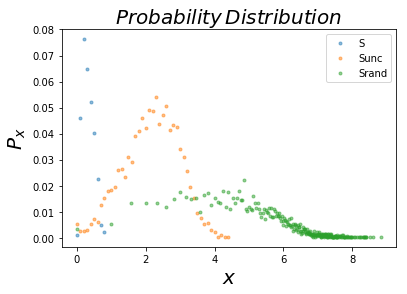

In [85]:
def probability_distribution_function(x, label):
    countdict = Counter(x)
    for key in countdict.keys():
        countdict[key] /= float(len(x))
    print(np.sum(list(countdict.values())))
    plt.plot(list(countdict.keys()), list(countdict.values()),'.', alpha=0.5, label=label)
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$P_{x}$', fontsize=20)
    plt.legend()
    plt.title('$Probability\,Distribution$', fontsize=20)
    plt.savefig('./picture/entropy.png',dpi=100)


probability_distribution_function(sorted([np.round(i, 1) for i in select_users['S_loc']]), 'S')
probability_distribution_function(sorted([np.round(i, 1) for i in select_users['Sunc_loc']]), 'Sunc')
probability_distribution_function(sorted([math.log(i, 2) for i in select_users['location']]), 'Srand')



# correlation explore

In [3]:
basename_clean=pd.read_csv('./basename_clean.csv')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
basename_clean=basename_clean[['att_median','loc_median','terminal_price','house_price','fees']]

In [5]:
basename_clean=basename_clean.dropna(axis=0,how='any')
# basename_clean=basename_clean.fillna(basename_clean.mean())

In [6]:
# for i in ['terminal_price','house_price','fees']:
#     basename_clean[i]=basename_clean[i].apply(lambda x: (x-np.mean(basename_clean[i]))/np.std(basename_clean[i]))

def normalize(x):
    mean=np.mean(x)
    std=np.std(x)
    return (x-mean)/std

basename_clean=basename_clean.apply(lambda x : normalize(x))

In [18]:
def Pearson(xvalue,yvalue,bin_count):
    group=pd.qcut(basename_clean[xvalue],bin_count)
    x=basename_clean.groupby(group)[xvalue].mean().values
    y=basename_clean.groupby(group)[yvalue].mean().values
    y=np.cumsum(y)
    ye=basename_clean.groupby(group)[yvalue].sem().values
    r=pearsonr(x, y)
    return x,y,ye,r

ValueError: Bin edges must be unique: array([  4523.        ,  19721.        ,  25994.        ,  33107.92937193,
        33107.92937193,  33107.92937193,  33107.92937193,  33107.92937193,
        33107.92937193,  35930.        ,  47332.        , 131270.        ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

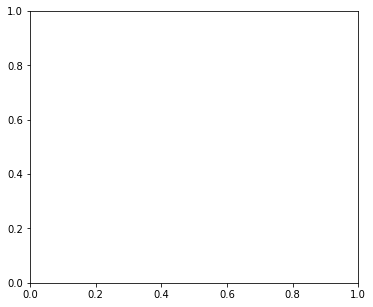

In [19]:
fig = plt.figure(figsize=(20, 5),facecolor='white')
ax = fig.add_subplot(131)
x,y,ye,r=Pearson('house_price','att_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='online'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
x,y,ye,r=Pearson('house_price','loc_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='offline'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
plt.legend(fontsize=15)
plt.xlabel('regularized house price',size=20)
plt.ylabel('zscore',size=20)

ax = fig.add_subplot(132)
x,y,ye,r=Pearson('terminal_price','att_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='online'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
x,y,ye,r=Pearson('terminal_price','loc_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='offline'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
plt.legend(fontsize=15)
plt.xlabel('regularized terminal price',size=20)

ax = fig.add_subplot(133)
x,y,ye,r=Pearson('fees','att_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='online'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
x,y,ye,r=Pearson('fees','loc_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='offline'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
plt.legend(fontsize=15)
plt.xlabel('regularized fees',size=20)

plt.tight_layout()
plt.savefig('./picture/bindata.png',dpi=100)
plt.show()

In [7]:
def Pearson(xvalue,yvalue,bin_count):
    group=pd.cut(basename_clean[xvalue],bin_count)
    x=basename_clean.groupby(group)[xvalue].mean().values
    y=basename_clean.groupby(group)[yvalue].mean().values
#     y=np.cumsum(y)
    ye=basename_clean.groupby(group)[yvalue].sem().values
    r=pearsonr(x, y)
    return x,y,ye,r

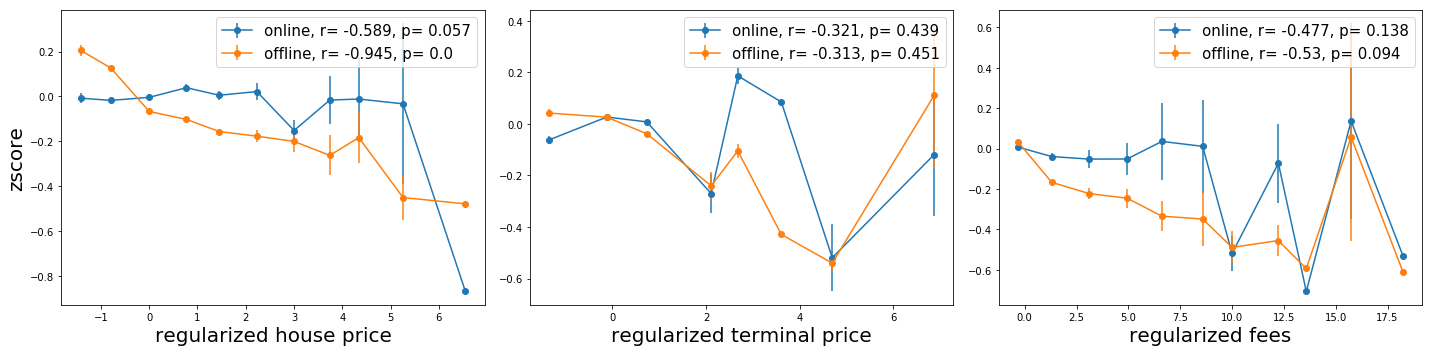

In [8]:
fig = plt.figure(figsize=(20, 5),facecolor='white')
ax = fig.add_subplot(131)
x,y,ye,r=Pearson('house_price','att_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='online'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
x,y,ye,r=Pearson('house_price','loc_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='offline'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
plt.legend(fontsize=15)
plt.xlabel('regularized house price',size=20)
plt.ylabel('zscore',size=20)

ax = fig.add_subplot(132)
x,y,ye,r=Pearson('terminal_price','att_median',8)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='online'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
x,y,ye,r=Pearson('terminal_price','loc_median',8)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='offline'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
plt.legend(fontsize=15)
plt.xlabel('regularized terminal price',size=20)

ax = fig.add_subplot(133)
x,y,ye,r=Pearson('fees','att_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='online'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
x,y,ye,r=Pearson('fees','loc_median',11)
plt.errorbar(x,y,yerr=ye, fmt='-o',label='offline'+', '+'r= '+str(round(r[0],3))+', '+'p= '+str(round(r[1],3)))
plt.legend(fontsize=15)
plt.xlabel('regularized fees',size=20)


plt.tight_layout()
plt.savefig('./picture/bindata1.png',dpi=100)
plt.show()

In [696]:
basename_clean=pd.read_csv('./basename_clean.csv')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [697]:
basename_clean=basename_clean[['att_median','loc_median','terminal_price','house_price','fees','sex']]

In [698]:
basename_clean=basename_clean.dropna(axis=0,how='any')
# basename_clean=basename_clean.fillna(basename_clean.mean())

In [699]:
for i in ['att_median','loc_median','terminal_price','house_price','fees']:
    basename_clean[i]=basename_clean[i].apply(lambda x: (x-np.mean(basename_clean[i]))/np.std(basename_clean[i]))

# def normalize(x):
#     mean=np.mean(x)
#     std=np.std(x)
#     return (x-mean)/std

# basename_clean=basename_clean.apply(lambda x : normalize(x))

In [700]:
def Pearson(xvalue,yvalue,bin_count):
    group=pd.cut(basename_clean[xvalue],bin_count)
    a=basename_clean.groupby([group,'sex'])[xvalue].mean().reset_index(name='1')
    x1=a[a['sex']=='女']['1']
    x2=a[a['sex']=='男']['1']
    b=basename_clean.groupby([group,'sex'])[yvalue].mean().reset_index()
    y1=b[b['sex']=='女'][yvalue]
    y2=b[b['sex']=='男'][yvalue]
    y1=np.cumsum(y1)
    y2=np.cumsum(y2)
    c=basename_clean.groupby([group,'sex'])[yvalue].sem().reset_index()
    ye1=c[c['sex']=='女'][yvalue]
    ye2=c[c['sex']=='男'][yvalue]
    r1=pearsonr(x1,y1)
    r2=pearsonr(x2,y2)
    return x1,y1,ye1,x2,y2,ye2,r1,r2

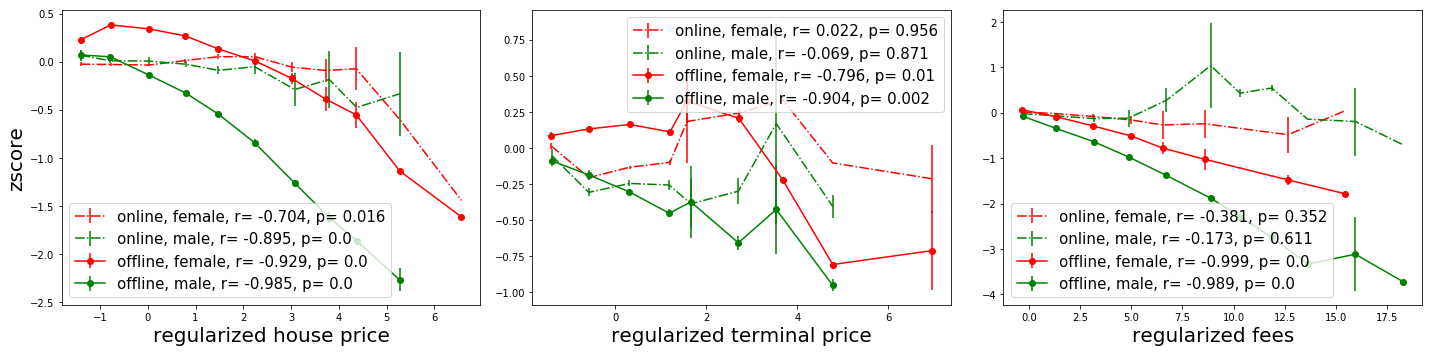

In [701]:
fig = plt.figure(figsize=(20, 5),facecolor='white')
ax = fig.add_subplot(131)
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('house_price','att_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='-.',label='online'+', '+'female'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='-.',label='online'+', '+'male'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('house_price','loc_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='o-',label='offline'+', '+'female'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='o-',label='offline'+', '+'male'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
plt.xlabel('regularized house price',size=20)
plt.legend(fontsize=15)
plt.ylabel('zscore',size=20)

ax = fig.add_subplot(132)
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('terminal_price','att_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='-.',label='online'+', '+'female'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='-.',label='online'+', '+'male'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('terminal_price','loc_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='o-',label='offline'+', '+'female'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='o-',label='offline'+', '+'male'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
plt.legend(fontsize=15)
plt.xlabel('regularized terminal price',size=20)

ax = fig.add_subplot(133)
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('fees','att_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='-.',label='online'+', '+'female'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='-.',label='online'+', '+'male'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('fees','loc_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='o-',label='offline'+', '+'female'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='o-',label='offline'+', '+'male'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
plt.legend(fontsize=15)
plt.xlabel('regularized fees',size=20)

plt.tight_layout()
plt.savefig('./picture/sex.png',dpi=100)
plt.show()

In [702]:
basename_clean=pd.read_csv('./basename_clean.csv')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [703]:
basename_clean=basename_clean[['att_median','loc_median','terminal_price','house_price','fees','age']]

In [704]:
basename_clean=basename_clean.dropna(axis=0,how='any')
# basename_clean=basename_clean.fillna(basename_clean.mean())

In [705]:
for i in ['att_median','loc_median','terminal_price','house_price','fees']:
    basename_clean[i]=basename_clean[i].apply(lambda x: (x-np.mean(basename_clean[i]))/np.std(basename_clean[i]))

# def normalize(x):
#     mean=np.mean(x)
#     std=np.std(x)
#     return (x-mean)/std

# basename_clean=basename_clean.apply(lambda x : normalize(x))

In [706]:
basename_clean['age']=basename_clean['age'].apply(lambda x: 0 if x<30 else 1)

In [707]:
def Pearson(xvalue,yvalue,bin_count):
    group=pd.cut(basename_clean[xvalue],bin_count)
    a=basename_clean.groupby([group,'age'])[xvalue].mean().reset_index(name='new')
    x1=a[a['age']==0]['new']
    x2=a[a['age']==1]['new']
    b=basename_clean.groupby([group,'age'])[yvalue].mean().reset_index()
    y1=b[b['age']==0][yvalue]
    y2=b[b['age']==1][yvalue]
    y1=np.cumsum(y1)
    y2=np.cumsum(y2)
    c=basename_clean.groupby([group,'age'])[yvalue].sem().reset_index()
    ye1=c[c['age']==0][yvalue]
    ye2=c[c['age']==1][yvalue]
    r1=pearsonr(x1,y1)
    r2=pearsonr(x2,y2)
    return x1,y1,ye1,x2,y2,ye2,r1,r2

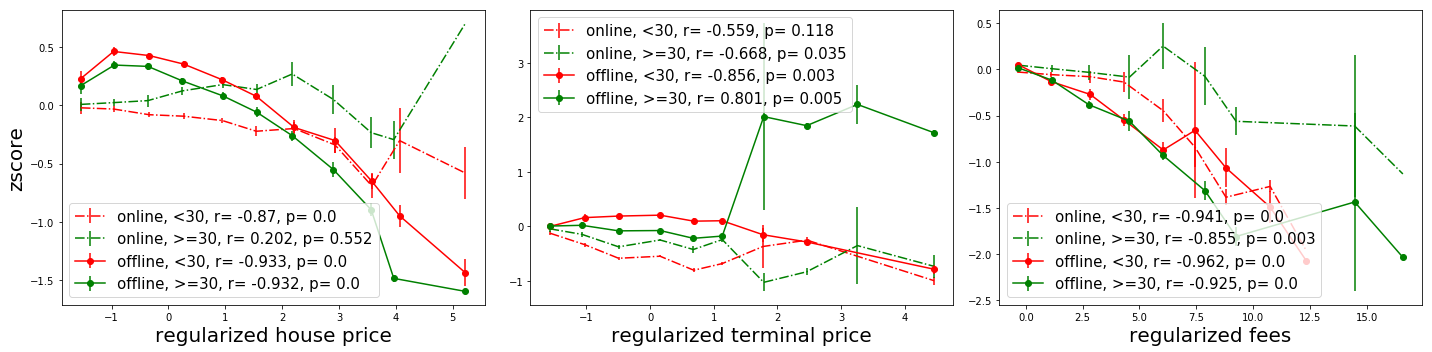

In [708]:
fig = plt.figure(figsize=(20, 5),facecolor='white')
ax = fig.add_subplot(131)
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('house_price','att_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='-.',label='online'+', '+'<30'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='-.',label='online'+', '+'>=30'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('house_price','loc_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='o-',label='offline'+', '+'<30'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='o-',label='offline'+', '+'>=30'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
plt.xlabel('regularized house price',size=20)
plt.legend(fontsize=15)
plt.ylabel('zscore',size=20)

ax = fig.add_subplot(132)
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('terminal_price','att_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='-.',label='online'+', '+'<30'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='-.',label='online'+', '+'>=30'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('terminal_price','loc_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='o-',label='offline'+', '+'<30'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='o-',label='offline'+', '+'>=30'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
plt.legend(fontsize=15)
plt.xlabel('regularized terminal price',size=20)

ax = fig.add_subplot(133)
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('fees','att_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='-.',label='online'+', '+'<30'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='-.',label='online'+', '+'>=30'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
x1,y1,ye1,x2,y2,ye2,r1,r2=Pearson('fees','loc_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='o-',label='offline'+', '+'<30'+', '+'r= '+str(round(r1[0],3))+', '+'p= '+str(round(r1[1],3)),color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='o-',label='offline'+', '+'>=30'+', '+'r= '+str(round(r2[0],3))+', '+'p= '+str(round(r2[1],3)),color='g')
plt.legend(fontsize=15)
plt.xlabel('regularized fees',size=20)

plt.tight_layout()
plt.savefig('./picture/age.png',dpi=100)
plt.show()

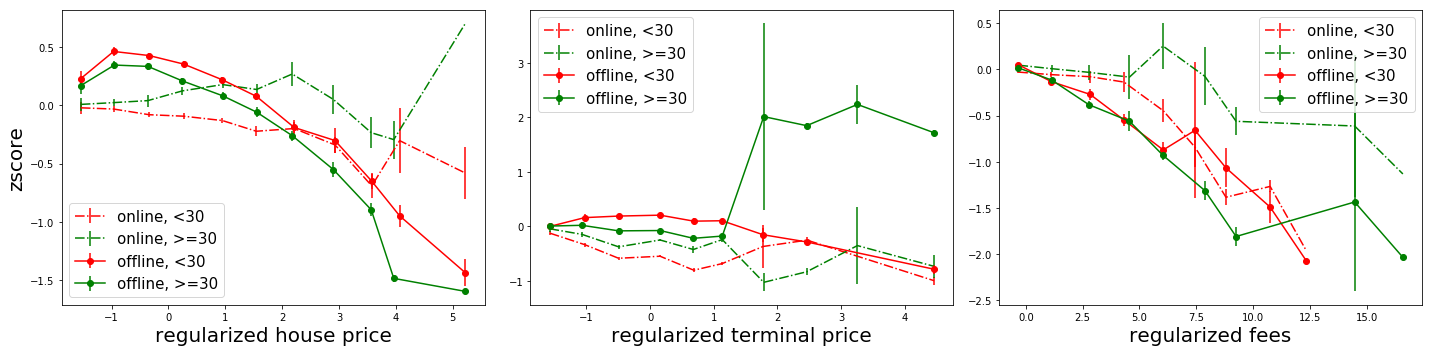

In [667]:
fig = plt.figure(figsize=(20, 5),facecolor='white')
ax = fig.add_subplot(131)
x1,y1,ye1,x2,y2,ye2=Pearson('house_price','att_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='-.',label='online'+', '+'<30',color='r')
plt.errorbar(x2, y2,yerr=ye2, fmt='-.',label='online'+', '+'>=30',color='g')
x1,y1,ye1,x2,y2,ye2=Pearson('house_price','loc_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='o-',label='offline'+', '+'<30',color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='o-',label='offline'+', '+'>=30',color='g')
plt.xlabel('regularized house price',size=20)
plt.legend(fontsize=15)
plt.ylabel('zscore',size=20)

ax = fig.add_subplot(132)
x1,y1,ye1,x2,y2,ye2=Pearson('terminal_price','att_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='-.',label='online'+', '+'<30',color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='-.',label='online'+', '+'>=30',color='g')
x1,y1,ye1,x2,y2,ye2=Pearson('terminal_price','loc_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='o-',label='offline'+', '+'<30',color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='o-',label='offline'+', '+'>=30',color='g')
plt.legend(fontsize=15)
plt.xlabel('regularized terminal price',size=20)

ax = fig.add_subplot(133)
x1,y1,ye1,x2,y2,ye2=Pearson('fees','att_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='-.',label='online'+', '+'<30',color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='-.',label='online'+', '+'>=30',color='g')
x1,y1,ye1,x2,y2,ye2=Pearson('fees','loc_median',11)
plt.errorbar(x1,y1,yerr=ye1, fmt='o-',label='offline'+', '+'<30',color='r')
plt.errorbar(x2,y2,yerr=ye2, fmt='o-',label='offline'+', '+'>=30',color='g')
plt.legend(fontsize=15)
plt.xlabel('regularized fees',size=20)

plt.tight_layout()
plt.savefig('./picture/age.png',dpi=100)
plt.show()

In [9]:
basename_clean=pd.read_csv('./basename_clean.csv')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
basename_clean=basename_clean[['att_median','loc_median','terminal_price','house_price','fees','age','sex']]

In [11]:
# basename_clean=basename_clean.dropna(axis=0,how='any')
basename_clean=basename_clean.fillna(basename_clean.mean())

In [139]:
# for i in ['att_median','loc_median','terminal_price','house_price','fees']:
#     basename_clean[i]=basename_clean[i].apply(lambda x: (x-np.mean(basename_clean[i]))/np.std(basename_clean[i]))

# def normalize(x):
#     mean=np.mean(x)
#     std=np.std(x)
#     return (x-mean)/std

# basename_clean=basename_clean.apply(lambda x : normalize(x))

KeyboardInterrupt: 

In [12]:
basename_clean['sex']=basename_clean['sex'].apply(lambda x:0 if x=='男' else 1)
# basename_clean['age']=basename_clean['age'].apply(lambda x:0 if x<30.0 else 1)

In [125]:
for i in ['att_median','loc_median','terminal_price','house_price','fees']:
    rs = np.linspace(min(basename_clean[i]),max(basename_clean[i]),12)
    rs = np.transpose(np.vstack((rs[:-1],rs[1:])))
    for start,end in rs:
        category=basename_clean[(basename_clean[i]>=start) & (basename_clean[i]<end)].index
        basename_clean.ix[category,i+'1']=rs.tolist().index([start,end])+1

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [13]:
basename_clean.head()

,att_median,loc_median,terminal_price,house_price,fees,age,sex
0,13.524085,25.286933,1699.000000,40007.0,64.667808,75.000000,0
1,53.966306,13.897337,2599.000000,18609.0,34.560000,32.168806,1
2,15.446460,9.378271,4199.000000,40252.0,64.667808,24.000000,0
3,15.153301,6.199864,4199.000000,41821.0,338.600000,28.000000,0
4,19.592811,4.697026,2393.865041,31774.0,39.080000,32.168806,1


In [15]:
reg = smf.ols('loc_median ~ house_price',
               data = basename_clean).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             loc_median   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     368.2
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           6.60e-82
Time:                        13:21:42   Log-Likelihood:            -4.6326e+05
No. Observations:              100000   AIC:                         9.265e+05
Df Residuals:                   99998   BIC:                         9.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.0460      0.269     82.014      0.000      21.519      22.573
house_price    -0.0001   7.76e-06    -19.188      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   109520.602   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14032070.221
Skew:                           5.482   Prob(JB):                         0.00
Kurtosis:                      59.987   Cond. No.                     1.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""